<a href="https://colab.research.google.com/github/Shalu-Yadav0811/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [44]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [45]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [46]:
# Loading the dataset to a pandas DataFrame

In [47]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)

In [48]:
# Print first five rows of DataFrame
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [49]:
# Add target column to the DataFrame
house_price_dataframe['price']= house_price_dataset.target

In [50]:
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [51]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
# Checking the number of rows and columns in dataframe
house_price_dataframe.shape

(20640, 9)

In [53]:
# Checking for missing/null values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [54]:
# Statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [55]:
correlation = house_price_dataframe.corr()

<Axes: >

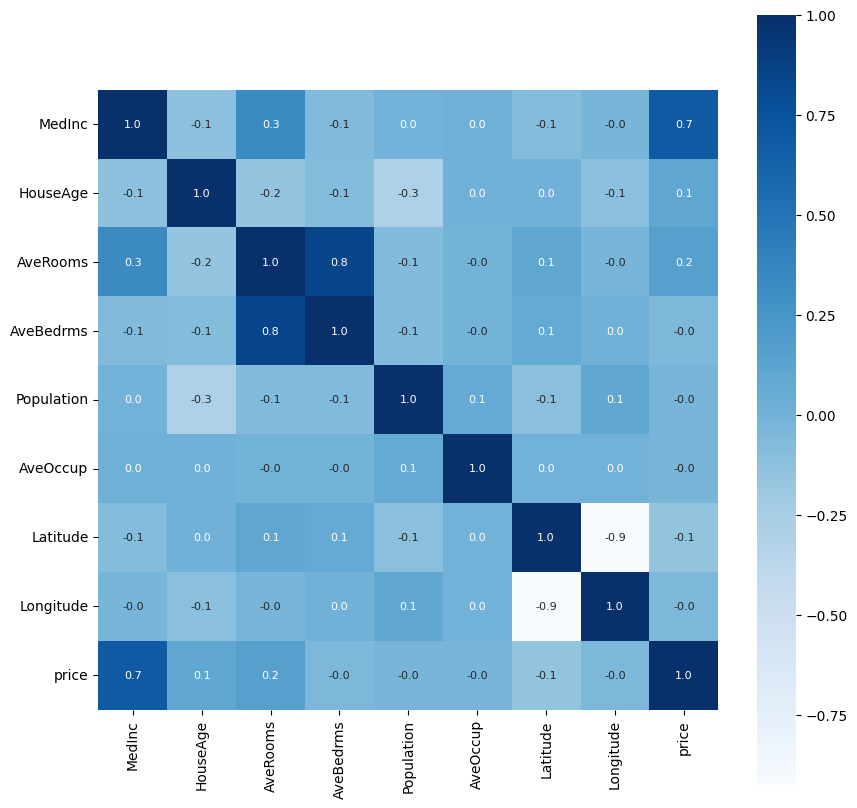

In [56]:
# Constructing a Heap Map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws = {'size':8}, cmap='Blues')
# cbar -> colour bar, square -> all values in square, fmt -> float values you want after the decimal point, annot -> feature names or values,
# annot_kws -> annotaion size (i.e numbers, texts, characters), cmap -> colour of map want to be

Splitting the data and Target

In [57]:
# Separating label data from dataset
X = house_price_dataframe.drop(['price'], axis = 1)
Y = house_price_dataframe['price']

In [58]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Training data and Test data

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
print(X_test, Y_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10385  6.4114      15.0  7.527559   1.049869      2529.0  3.318898     33.60   
1943   4.1843      12.0  6.330084   1.041783      2033.0  2.831476     38.62   
7490   1.7411      35.0  5.369159   1.294393       909.0  4.247664     33.93   
16889  3.4412      39.0  4.173405   1.074573      2156.0  1.937107     37.59   
11416  7.8195      16.0  8.602349   1.058725      2142.0  3.593960     33.70   
...       ...       ...       ...        ...         ...       ...       ...   
13767  4.8173      25.0  6.160494   1.081481      1071.0  2.644444     34.04   
20606  2.0800      30.0  5.140316   1.055336      1702.0  3.363636     39.12   
7340   2.1743      30.0  3.364395   0.994437      3208.0  4.461752     33.97   
14312  1.6023      32.0  3.878788   1.069697      1335.0  4.045455     32.70   
20262  4.2227      28.0  4.899533   0.947430      2556.0  2.985981     34.21   

       Longitude  
10385    -117.65  
1

In [61]:
print(X.shape, X_test.shape, X_test.shape)

(20640, 8) (4128, 8) (4128, 8)


Model Training

XGBoost Regressor

In [62]:
# Loading the model
model = XGBRegressor()

In [63]:
# training  the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [64]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [65]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [66]:
# R square Error
score_1 = metrics.r2_score(Y_train, training_data_prediction) # Find the variance between these values (Y_train, training_data_prediction) using r2_score

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction) # Find the mean of the differences between these values (Y_train, training_data_prediction) using mean_absolute_error

In [67]:
print("R squared error : ",score_1) # value can be 1 or near to one or closer to zero so that it is considered as performing perfectly and claculating the values correctly

R squared error :  0.943650140819218


In [68]:
print("Mean Absolute error : ",score_2)

Mean Absolute error :  0.1933648700612105


Visualizing the actual prices and predicted prices

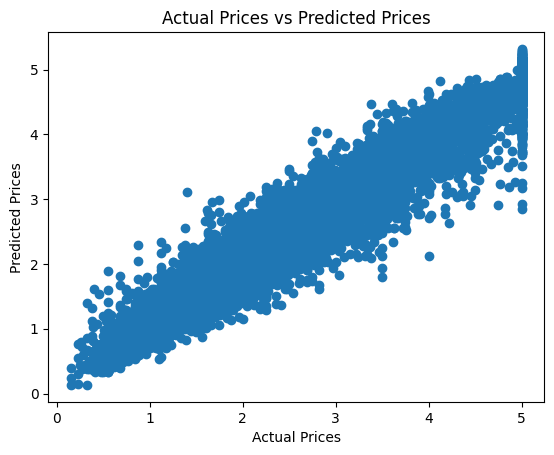

In [74]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Test Data

In [69]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [70]:
# R square Error
score_3 = metrics.r2_score(Y_test, test_data_prediction) # Find the variance between these values (Y_train, training_data_prediction) using r2_score

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction) # Find the mean of the differences between these values (Y_train, training_data_prediction) using mean_absolute_error

In [71]:
print("R squared error : ",score_3)

R squared error :  0.8338000331788725


In [72]:
print("Mean Absolute error : ",score_4)

Mean Absolute error :  0.3108631800268186


In [73]:
print("R squared error of train data : ",score_1)
print("Mean Absolute error of train data : ",score_2)
print("R squared error of test data : ",score_3)
print("Mean Absolute error of test data : ",score_4)

R squared error of train data :  0.943650140819218
Mean Absolute error of train data :  0.1933648700612105
R squared error of test data :  0.8338000331788725
Mean Absolute error of test data :  0.3108631800268186


Visualizing the actual prices and predicted prices

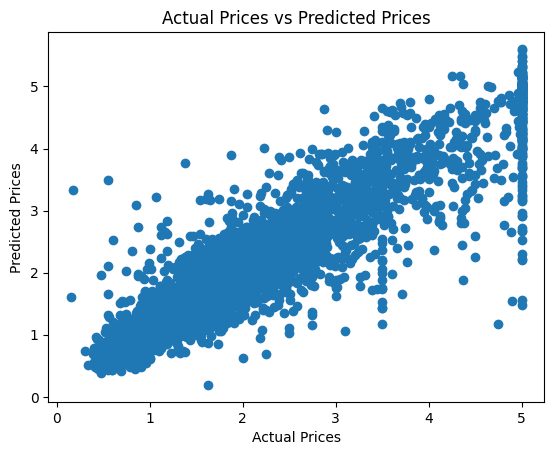

In [75]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()